# Problem 1
 Consider shuttle dispatching problem in which a dispatcher is responsible to decide whether or not to dispatch a shuttle at each decision epoch depending on number of customers waiting for the service. A standard shuttle dispatch problem has following parameters:

K = The capacity of a shuttle if it is dispatched. 

At = A random variable giving the number of customers arriving during time interval t. 

cf = The cost of dispatching a shuttle. 

ch = The cost per customer left waiting per time period.

Given K = 15, cf = 100, ch = 2 and assuming that At follows unif{1,5}, model the problem and solve it using:

a) Enumeration (with time period $T =500$) 

b) Value iteration ($T = \infty$) 

c) Policy iteration.

You can assume that number of people in station can not exceed 200 and discount rate γ = 0.95.


## Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Constant

In [0]:
K = 15
c_f = 100
c_h = 2
gamma = 0.95
max_customer = 200

T = 500

## Rewards function

In [0]:
def r(s,a):
    """
    s: number of current waiting customer 0-max_customer
    a: if or not dispatch a shuttle {0,1}
    """
    return -(a*c_f + max(0,s-a*K)*c_h)
    

## Part (a) Enumeration

For part (a), plot optimal value function at time 0 versus number of customers waiting.

In [0]:
V = np.zeros((T+2,max_customer+1)) # value function, size of [time, #customer]

for t in range(T,-1,-1):
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0,1]:
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[t+1,s_next])
        V[t,s] = max(v_a)



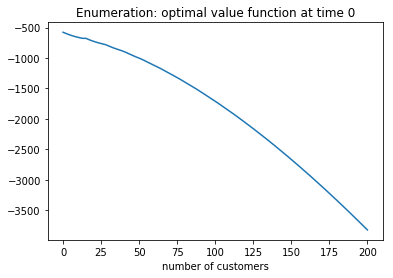

In [5]:
plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.title("Enumeration: optimal value function at time 0")
plt.show()

## part (b)
For part (b), plot optimal value function versus number of customers waiting.

In [0]:
max_iter = 1000
eps = 1e-6
interval = 100

V = np.zeros((2,max_customer+1)) # value iteration. [cur, next]

for i in range(max_iter):
    V[1] = V[0]
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0,1]:
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[1,s_next])
        V[0,s] = max(v_a)
    if (np.linalg.norm(V[0]-V[1]) < eps):
        break
    if (i%interval == 0):
        print(i,np.linalg.norm(V[0]-V[1]))
        
print("Converged at #iteration = %d, residual = %f"%(i, np.linalg.norm(V[0]-V[1])))

0 3278.2312304045913
100 2.849879646666814
200 0.01687279572192988
300 9.989588043432436e-05
Converged at #iteration = 390, residual = 0.000001


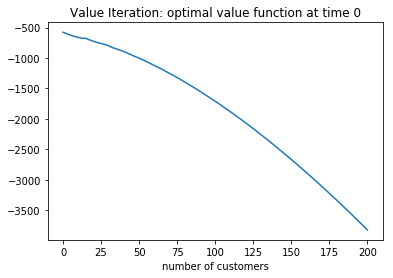

In [0]:
plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.title("Value Iteration: optimal value function at time 0")
plt.show()

## part (c)
For part (c), plot optimal policy versus number of customers waiting.

In [0]:
def prob(policy):
    P = np.zeros((max_customer+1, max_customer+1))
    for s in range(max_customer+1):        
        a = policy[s]
        idx = max(s-a*K, 0) + 1
        for i in range(5):
            P[s, min(max_customer, idx+i)] += 1/5
    return P

pi = np.zeros((2,max_customer+1)).astype(int)

for i in range(max_iter):
    P = prob(pi[0])
    R = np.zeros(max_customer+1)
    for s in range(max_customer+1):
        R[s] = r(s, pi[0,s])
    A = np.eye(max_customer+1) - gamma*P
    b = np.mat(R).transpose()
    V = np.array(np.linalg.solve(A, b).transpose())[0]
    
    pi[1] = pi[0]
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0, 1]:
            
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[s_next])
            
        pi[0,s] = np.argmax(v_a)
    print(i, np.linalg.norm(pi[0]-pi[1]) )
    if np.linalg.norm(pi[0]-pi[1]) < eps:
        break
print("Converged at #iteration = %d, residual = %f"%(i, np.linalg.norm(pi[0]-pi[1])))

0 14.0
1 5.291502622129181
2 4.69041575982343
3 2.6457513110645907
4 1.0
5 0.0
Converged at #iteration = 5, residual = 0.000000


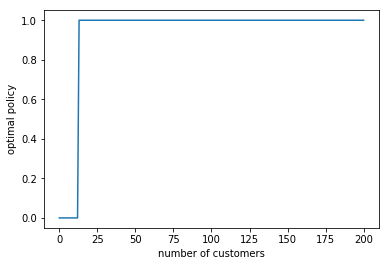

optimal policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
plt.figure()
#plt.scatter(enumerate([pi[0]]))
plt.plot(pi[0])
plt.xlabel("number of customers")
plt.ylabel("optimal policy")
plt.show()

print('optimal policy: ', policy)

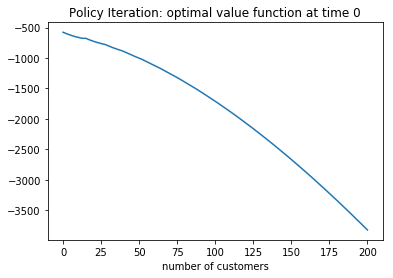

In [20]:
plt.figure()
plt.plot(V)
plt.xlabel("number of customers")
plt.title("Policy Iteration: optimal value function at time 0")
plt.show()

# Problem 2

The differences from problem 1 are:
* There are 5 types of customers with $c_h = \{1,1.5,2,2.5,3\}$
* each type customer cannot exceed 100.
* K = 30.

In [0]:
K = 30
c_f = 100
#c_h = [1, 1.5, 2, 2.5, 3]
c_h = [1, 1.5, 2, 2.5]
#num_types = 5
num_types = 4
gamma = 0.95
max_customer_each = 100

At = [1,2,3,4,5]

#s = [0]*5

T = 500

In [0]:
# encode the states S[3,4,5,6,7] into 3*pow(101, 0) + 4*pow(101, 1) + ^ + 7*pow(101, 5)
num_states = pow(max_customer_each + 1,num_types)

def encode_list(list_state):
    state = 0
    for i in range(num_types):
        state += list_state[i] * pow(max_customer_each+1, i)
    return(state)

def decode_state(state):
    #state_tmp = state.copy()
    list_state = [0]*num_types
    for i in range(num_types):
        list_state[i] = state%(max_customer_each+1)
        state = state//(max_customer_each+1)
    return(list_state)


In [22]:
l = [34,47,54,63,72]
s = encode_list(l)
l = decode_state(s)
print(s,l)

65464598 [34, 47, 54, 63]


rewards function

In [0]:
def rewards_and_next(state,action):
    """
    state: encoded state, need to be decode
    a: if or not dispatch a shuttle {0,1}
    
    return rewards and next state 
    """
    list_state = decode_state(state)
    list_state_next = list_state.copy()
    
    result = -a*c_f
    remain_a = a*K
    for i in range(num_types-1,-1,-1):
        if remain_a>0:
            take_off= min(remain_a, list_state[i])
            result += -c_h[i] * (list_state[i]-take_off)
            remain_a -= take_off
            list_state_next[i] -= take_off
            
            ### arriving customers
            list_state_next[i] = [min(list_state_next[i]+j,max_customer_each) for j in At]

    return (result,list_state_next)

In [24]:
rewards_and_next(encode_list(l),1)

(0, [34, 47, 54, 63])

In [0]:
def gen_next_state_from_list(list_state):
    """
    list_state: 
    """
    dim = len(list_state)

    result = list_state[0]
    for i in range(1, dim):
        lenth = len(result)
        result = result * len(list_state[i])
        for j in range(len(result)):
            result[j] = result[j] + list_state[i][j//lenth] * pow(max_customer_each + 1,i)
    
    
    return(result)

## Due to the huge memory usage, I have to reduce one dimension of this problem

In [7]:
T = 10

num_states = pow(max_customer_each+1,num_types)

V = np.zeros((2,num_states), dtype=np.float16) # value function, size of [time, #customer]

for t in range(T,-1,-1):
    V[1] = V[0]
    for s in range(num_states):
        v_a = [0, 0]
        for a in [0,1]:
            #list_state = decode(s)
            r, list_state_next = rewards_and_next(s, a)
            
            s_next = gen_next_state_from_list(list_state_next)
            
            v_a[a] = r(s,a) + gamma * np.mean(V[1,s_next])
        V[0,s] = max(v_a)


TypeError: ignored

In [9]:
r

0

In [0]:
plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.title("Enumeration: optimal value function at time 0")
plt.show()

In [0]:
num_states = pow(100+1,5)

V = np.zeros((2,num_states)) # value function, size of [time, #customer]


In [0]:
import numpy as np
a = np.zeros((pow(10,10)), dtype=np.float16)

In [3]:
type(a)

numpy.ndarray